## Punto 2
Considere la función $f(x)=e^{x}\cos(4x)$, en el intervalo $[-\pi,\pi]$.
1. Realice un programa para calcular la derivada numérica de primer orden, usando las formulas de dos, tres y cinco puntos. En éste programa usted debe asumir $h=2\pi/N$, donde $N$ es el número de intervalos de división. Su programa debe exportar en un archivo de texto de cinco columnas correspondientes a los siguientes datos: $x_{i}$, $f'^{(2)}_{i}$, $f'^{(3)}_{i}$, $f'^{(5)}_{i}$ y $f'^{(analítica)}$, donde $f'^{(n)}_{i}$ es el resultado obtenido con la fórmula de $n$ puntos, y $f'^{(analitica)}$ el resultado obtenido con la expresión exacta.

In [1]:
import numpy as np #importación del módulo numpy y asignación del nickname np;
import pandas as pd #importación del módulo pandas y asignación del nickname pd;

#se pide por pantalla el número de intervalos y se almacena en la variable N;
N=int(input("Inserte el número de intervalos de división a trabajar: "))

x=np.linspace(-np.pi,np.pi,N+1) #creación del intervalo con N+1 puntos;
h=(2*np.pi)/N #definición de h;

#función f(x);
f=np.exp(x)*np.cos(4*x)
#explicación: arreglo de numpy cuyos elementos son la función f(x) evaluada en cada elemento de x;

#derivada de f(x) analítica;
f_prim=np.exp(x)*np.cos(4*x)-4*np.exp(x)*np.sin(4*x)
#Explicación: arreglo de numpy cuyo elementos son la derivada de f(x) evaluada en cada elemento de x;

f=[i for i in f] #transformación de arreglo de numpy f a lista;
f_prim=[i for i in f_prim] #transformación de arreglo de numpy f_prim a lista;

#creación de listas vacías;
f_1_2=[] #almacén de primera derivada usando dos puntos;
f_1_3=[] #almacén de primera derivada usando tres puntos;
f_1_5=[] #almacén de primera derivada usando cinco puntos;

#derivada númerica de primer orden usando 2 puntos (los índices de las listas o arreglos inician desde cero);
for i in range(len(f)):
    if i==len(f)-1:
        f_1_2.append((f[i]-f[i-1])/h) #derivada para el último punto;
    else:
        f_1_2.append((f[i+1]-f[i])/h) #derivada para el resto de puntos;

#derivada númerica de primer orden usando 3 puntos;
for i in range(len(f)):
    if i==len(f)-1:
        f_1_3.append((f[i]-f[i-1])/h) #derivada para el último punto;
        
    elif i==0:
        f_1_3.append((f[i+1]-f[i])/h) #derivada para el primer punto;
    else:
        f_1_3.append((f[i+1]-f[i-1])/(2*h)) #derivada para el resto de puntos;

#derivada númerica de primer orden usando 5 puntos;
for i in range(len(f)):
    if i==len(f)-1:
        f_1_5.append((f[i]-f[i-1])/h) #derivada para el último punto;
        
    elif i==0:
        f_1_5.append((f[i+1]-f[i])/h) #derivada para el primer punto;
        
    elif i==1 or i==len(f)-2:
        f_1_5.append((f[i+1]-f[i-1])/(2*h)) #derivada para el segundo y penúltimo punto;
        
    else:
        f_1_5.append((1/(12*h))*(f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])) #derivada para el resto de puntos;


#importación de datos a archivo csv;        
datos={"x":x, "df(2)":f_1_2, "df(3)":f_1_3, "df(5)":f_1_5 ,"df(analitic)":f_prim } #creación de diccionario datos.

df=pd.DataFrame(datos) #creación de un dataframe para almacenar datos;

df.to_csv("datos_derivada_numerica.csv") #conversión de dataframe a archivo csv con nombre entre comillas;
#el archivo de texto se guardará dentro de la carpeta actual del archivo .py;

#lectura de datos en arcivo csv;
df=pd.read_csv("datos_derivada_numerica.csv", header=None, skiprows=1, names=["Número", "x", "df(2)",
                                                                              "df(3)", "df(5)", "df(analitic)"])
#número indica el número de datos y la posición del dato dentro del archivo;
#x indica el dato de posición;
#df(2) indica el dato de la derivada númerica con dos puntos;
#df(3) indica el dato de la derivada númerica con tres puntos;
#df(5) indica el dato de la derivada númerica con cinco puntos;
#df(analitic) indica el dato de la derivada analítica;


df #visualización de los datos.

Inserte el número de intervalos de división a trabajar: 10


,Número,x,df(2),df(3),df(5),df(analitic)
0,0,-3.141593,-0.173075,-0.173075,-0.173075,0.043214
1,1,-2.513274,0.178973,0.002949,0.002949,-0.255981
2,2,-1.884956,0.065300,0.122137,0.225823,0.624538
3,3,-1.256637,-0.826890,-0.380795,-0.649047,-0.994770
4,4,-0.628319,2.278464,0.725787,1.175067,0.822705
5,5,0.000000,-4.005081,-0.863309,-1.283417,1.000000
6,6,0.628319,4.141569,0.068244,-0.236179,-5.923577
7,7,1.256637,1.511092,2.826331,5.225709,14.452232
8,8,1.884956,-19.134800,-8.811854,-15.019396,-23.019664
9,9,2.513274,52.725227,16.795213,16.795213,19.037959


2. Ejecute su programa para los siguientes valores $N=5, 10, 50, 100, 500, 1000, 10000$. Para cada uno de estos valores, realice un gráfico comparando el resultado númerico con el analítico. Discuta sus resultados.

Inserte el número de intervalos de división a trabajar: 10
¿cuántos puntos usará la derivada que quiere visualizar?: 3


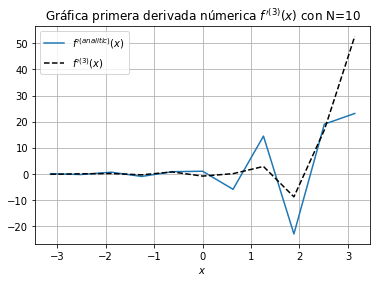

¿Desea ver la tabla de datos para la primera derivada? y/n: y
    Número         x      df(2)      df(3)      df(5)  df(analitic)
0        0 -3.141593  -0.173075  -0.173075  -0.173075      0.043214
1        1 -2.513274   0.178973   0.002949   0.002949     -0.255981
2        2 -1.884956   0.065300   0.122137   0.225823      0.624538
3        3 -1.256637  -0.826890  -0.380795  -0.649047     -0.994770
4        4 -0.628319   2.278464   0.725787   1.175067      0.822705
5        5  0.000000  -4.005081  -0.863309  -1.283417      1.000000
6        6  0.628319   4.141569   0.068244  -0.236179     -5.923577
7        7  1.256637   1.511092   2.826331   5.225709     14.452232
8        8  1.884956 -19.134800  -8.811854 -15.019396    -23.019664
9        9  2.513274  52.725227  16.795213  16.795213     19.037959
10      10  3.141593  52.725227  52.725227  52.725227     23.140693


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt #Importación del módulo matplotlib para usar pyplot y asignación del nickname plt;
import numpy as np #importación del módulo numpy y asignación del nickname np;
import pandas as pd #importación del módulo pandas y asignación del nickname pd;

#se pide por pantalla el número de intervalos y se almacena en la variable N;
N=int(input("Inserte el número de intervalos de división a trabajar: "))

x=np.linspace(-np.pi,np.pi,N+1) #creación del intervalo con N+1 puntos;
h=(2*np.pi)/N #definición de h;

#función f(x);
f=np.exp(x)*np.cos(4*x)
#explicación: arreglo de numpy cuyos elementos son la función f(x) evaluada en cada elemento de x;

#derivada de f(x) analítica;
f_prim=np.exp(x)*np.cos(4*x)-4*np.exp(x)*np.sin(4*x)
#Explicación: arreglo de numpy cuyo elementos son la derivada de f(x) evaluada en cada elemento de x;

f=[i for i in f] #transformación de arreglo de numpy f a lista;
f_prim=[i for i in f_prim] #transformación de arreglo de numpy f_prim a lista;

#creación de listas vacías;
f_1_2=[] #almacén de primera derivada usando dos puntos;
f_1_3=[] #almacén de primera derivada usando tres puntos;
f_1_5=[] #almacén de primera derivada usando cinco puntos;

#derivada númerica de primer orden usando 2 puntos (los índices de las listas o arreglos inician desde cero);
for i in range(len(f)):
    if i==len(f)-1:
        f_1_2.append((f[i]-f[i-1])/h) #derivada para el último punto;
    else:
        f_1_2.append((f[i+1]-f[i])/h) #derivada para el resto de puntos;

#derivada númerica de primer orden usando 3 puntos;
for i in range(len(f)):
    if i==len(f)-1:
        f_1_3.append((f[i]-f[i-1])/h) #derivada para el último punto;
        
    elif i==0:
        f_1_3.append((f[i+1]-f[i])/h) #derivada para el primer punto;
    else:
        f_1_3.append((f[i+1]-f[i-1])/(2*h)) #derivada para el resto de puntos;

#derivada númerica de primer orden usando 5 puntos;
for i in range(len(f)):
    if i==len(f)-1:
        f_1_5.append((f[i]-f[i-1])/h) #derivada para el último punto;
        
    elif i==0:
        f_1_5.append((f[i+1]-f[i])/h) #derivada para el primer punto;
        
    elif i==1 or i==len(f)-2:
        f_1_5.append((f[i+1]-f[i-1])/(2*h)) #derivada para el segundo y penúltimo punto;
        
    else:
        f_1_5.append((1/(12*h))*(f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])) #derivada para el resto de puntos;


#importación de datos a archivo csv;        
datos={"x":x, "df(2)":f_1_2, "df(3)":f_1_3, "df(5)":f_1_5 ,"df(analitic)":f_prim } #creación de diccionario datos.

df=pd.DataFrame(datos) #creación de un dataframe para almacenar datos;

df.to_csv("datos_derivada_numerica.csv") #conversión de dataframe a archivo csv con nombre entre comillas;
#el archivo de texto se guardará dentro de la carpeta actual del archivo .py;

#lectura de datos en arcivo csv;
df=pd.read_csv("datos_derivada_numerica.csv", header=None, skiprows=1, names=["Número", "x", "df(2)",
                                                                              "df(3)", "df(5)", "df(analitic)"])
#número indica el número de datos y la posición del dato dentro del archivo;
#x indica el dato de posición;
#df(2) indica el dato de la derivada númerica con dos puntos;
#df(3) indica el dato de la derivada númerica con tres puntos;
#df(5) indica el dato de la derivada númerica con cinco puntos;
#df(analitic) indica el dato de la derivada analítica;

#tabulación;
while True:
    Q=input("¿Desea ver la tabla de datos para la primera derivada? y/n: ")
    if Q=="y":
        print(df) #visualización de los datos;
        break
    else:
        break

#graficador de datos pyplot;
while True:
    n=int(input("¿cuántos puntos usará la derivada que quiere visualizar?: "))
    if n==2 or n==3 or n==5:
        if n==2:
            plt.plot(x,f_prim, "-", label="$f'^{(analitic)}(x)$") #gráficar primera derivada analítica;
            plt.plot(x,f_1_2,"-.",label="$f'^{(2)}(x)$", color= "red") #gráficar primera deriva númerica con dos puntos;
            plt.legend() #nombrar las curvas;
            plt.grid(True) #agregar rejillas;
            plt.xlabel("$x$") #nombrar el eje horizontal;
            plt.title("Gráfica primera derivada númerica $f'^{(2)}(x)$ con N=%i"%N) #título
            plt.show() #mostrar resultado.
            break #parar bucle infinito
        elif n==3:
            plt.plot(x,f_prim, "-", label="$f'^{(analitic)}(x)$")
            plt.plot(x,f_1_3,"--",label="$f'^{(3)}(x)$", color="k") #gráficar primera derivada númerica con tres puntos;
            plt.legend()
            plt.title("Gráfica primera derivada númerica $f'^{(3)}(x)$ con N=%i"%N)
            plt.grid(True) 
            plt.xlabel("$x$") 
            plt.show()
            break
        elif n==5:
            plt.plot(x,f_prim, "-", label="$f'^{(analitic)}(x)$")
            plt.plot(x,f_1_5,"--",label="$f'^{(5)}(x)$", color="orange") #gráficar primera derivada númerica con cinco puntos;
            plt.legend()
            plt.title("Gráfica primera derivada númerica $f'^{(5)}(x)$ con N=%i"%N)
            plt.grid(True) 
            plt.xlabel("$x$") 
            plt.show()
            break
    else:
        print("¡dato inválido! Solo puede usar 2, 3 o 5") #sugrencia;

# Punto 3
De la misma manera que en el literal anterior, realice un programa para calcular la derivada de segundo orden de la función del enunciado.

In [5]:
import numpy as np #Importación del módulo numpy y asignación del nickname np;
import pandas as pd #importación del módulo pandas y asignación del nickname pd;

#se pide por pantalla el número de intervalos y se almacena en la variable N;
N=int(input("Inserte el número de intervalos de división a trabajar: "))

x=np.linspace(-np.pi,np.pi,N+1) #creación del intervalo con N+1 puntos;
h=(2*np.pi)/N #definición de h;

#función f(x);
f=np.exp(x)*np.cos(4*x)
#explicación: arreglo de numpy cuyos elementos son la función f(x) evaluada en cada elemento de x;

#segunda derivada de f(x) analítica;
f_prim_2=-15*np.exp(x)*np.cos(4*x)-8*np.exp(x)*np.sin(4*x)
#Explicación: arreglo de numpy cuyo elementos son la segunda derivada de f(x) evaluada en cada elemento de x;

f=[i for i in f] #transformación de arreglo de numpy f a lista;
f_prim_2=[i for i in f_prim_2] #transformación de arreglo de numpy f_prim_2 a lista;
x=[i for i in x] #transformación de arreglo de numpy x a lista;

f_prim_2.pop(0) #eliminación del primer punto de la segunda derivada analítica;
f_prim_2.pop(len(f_prim_2)-1) #eliminación del último punto de la segunda derivada analítica;

#creación de listas vacías;
f_2_3=[] #almacén de la segunda derivada usando tres puntos;
f_2_5=[] #almacén de la segunda derivada usando cinco puntos;

#derivada númerica de segundo orden usando 3 puntos;
for i in range(len(f)):
    if i==0 or i==len(f)-1:
        #se pasa automáticamente al siguiente índice (se omiten estos pasos);
        pass 
    else:
        #derivada númerica de segundo orden con 3 puntos;
        f_2_3.append((f[i+1]-2*f[i]+f[i-1])/h**2) 

#derivada númerica de segundo orden usando 5 puntos;
for i in range(len(f)):
    if i==0 or i==len(f)-1:
        pass 
    elif i==1 or i==len(f)-2:
        #derivada númerica de segundo orden con 3 puntos;
        f_2_5.append((f[i+1]-2*f[i]+f[i-1])/h**2)
    else:
        #derivada númerica de segundo orden con 5 puntos;
        f_2_5.append(((-f[i-2]+16*f[i-1]-30*f[i]+16*f[i+1]-f[i+2])/(12*h**2)))
        
x.pop(0) #eliminación del primer elemento de x;
x.pop(len(x)-1) #eliminación del último elemento de x;

#importación de datos a archivo csv;        
datos={"x":x, "ddf(3)":f_2_3, "ddf(5)":f_2_5, "ddf(analitic)":f_prim_2 } #creación de diccionario datos.

df=pd.DataFrame(datos) #creación de un dataframe para almacenar datos;

df.to_csv("datos_derivada_2_numerica.csv") #conversión de dataframe a archivo csv con nombre entre comillas;
#el archivo de texto se guardará dentro de la carpeta actual del archivo .py;

#lectura de datos en arcivo csv;
df=pd.read_csv("datos_derivada_2_numerica.csv", header=None, skiprows=1, names=["Número", "x", "ddf(3)",
                                                                              "ddf(5)", "ddf(analitic)"])
#número indica el número de datos y la posición del dato dentro del archivo;
#x indica el dato de posición;
#ddf(3) indica el dato de la segunda derivada númerica con tres puntos;
#ddf(5) indica el dato de la segunda derivada númerica con cinco puntos;
#ddf(analitic) indica el dato de la segunda derivada analítica; 

df #visualización de los datos.

Inserte el número de intervalos de división a trabajar: 10


,Número,x,ddf(3),ddf(5),ddf(analitic)
0,0,-2.513274,0.560303,0.560303,0.602090
1,1,-1.884956,-0.180917,-0.139431,0.451438
2,2,-1.256637,-1.419964,-2.053409,-3.484676
3,3,-0.628319,4.942323,6.717755,8.982625
4,4,0.000000,-10.000572,-13.159678,-15.000000
5,5,0.628319,12.965797,16.309022,13.932781
6,6,1.256637,-4.186533,-3.226525,10.446583
7,7,1.884956,-32.858959,-47.517306,-80.637813
8,8,2.513274,114.368785,114.368785,207.864174


Inserte el número de intervalos de división a trabajar: 10
¿Desea ver la tabla de datos para la segunda derivada? y/n: 5
¿cuántos puntos usará la segunda derivada que quiere visualizar?: 5


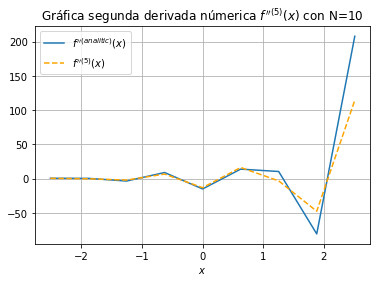

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt #Importación del módulo matplotlib y asignación del nickname plt;
import numpy as np #importación del módulo numpy y asignación del nickname np;
import pandas as pd #importación del módulo pandas y asignación del nickname pd;

#se pide por pantalla el número de intervalos y se almacena en la variable N;
N=int(input("Inserte el número de intervalos de división a trabajar: "))

x=np.linspace(-np.pi,np.pi,N+1) #creación del intervalo con N+1 puntos;
h=(2*np.pi)/N #definición de h;

#función f(x);
f=np.exp(x)*np.cos(4*x)
#explicación: arreglo de numpy cuyos elementos son la función f(x) evaluada en cada elemento de x;

#segunda derivada de f(x) analítica;
f_prim_2=-15*np.exp(x)*np.cos(4*x)-8*np.exp(x)*np.sin(4*x)
#Explicación: arreglo de numpy cuyo elementos son la segunda derivada de f(x) evaluada en cada elemento de x;

f=[i for i in f] #transformación de arreglo de numpy f a lista;
f_prim_2=[i for i in f_prim_2] #transformación de arreglo de numpy f_prim_2 a lista;
x=[i for i in x] #transformación de arreglo de numpy x a lista;

f_prim_2.pop(0) #eliminación del primer punto de la segunda derivada analítica;
f_prim_2.pop(len(f_prim_2)-1) #eliminación del último punto de la segunda derivada analítica;

#creación de listas vacías;
f_2_3=[] #almacén de la segunda derivada usando tres puntos;
f_2_5=[] #almacén de la segunda derivada usando cinco puntos;

#derivada númerica de segundo orden usando 3 puntos;
for i in range(len(f)):
    if i==0 or i==len(f)-1:
        #se pasa automáticamente al siguiente índice (se omiten estos pasos);
        pass 
    else:
        #derivada númerica de segundo orden con 3 puntos;
        f_2_3.append((f[i+1]-2*f[i]+f[i-1])/h**2) 

#derivada númerica de segundo orden usando 5 puntos;
for i in range(len(f)):
    if i==0 or i==len(f)-1:
        pass 
    elif i==1 or i==len(f)-2:
        #derivada númerica de segundo orden con 3 puntos;
        f_2_5.append((f[i+1]-2*f[i]+f[i-1])/h**2)
    else:
        #derivada númerica de segundo orden con 5 puntos;
        f_2_5.append(((-f[i-2]+16*f[i-1]-30*f[i]+16*f[i+1]-f[i+2])/(12*h**2)))
        
x.pop(0) #eliminación del primer elemento de x;
x.pop(len(x)-1) #eliminación del último elemento de x;

#importación de datos a archivo csv;        
datos={"x":x, "ddf(3)":f_2_3, "ddf(5)":f_2_5, "ddf(analitic)":f_prim_2 } #creación de diccionario datos.

df=pd.DataFrame(datos) #creación de un dataframe para almacenar datos;

df.to_csv("datos_derivada_2_numerica.csv") #conversión de dataframe a archivo csv con nombre entre comillas;
#el archivo de texto se guardará dentro de la carpeta actual del archivo .py;

#lectura de datos en arcivo csv;
df=pd.read_csv("datos_derivada_2_numerica.csv", header=None, skiprows=1, names=["Número", "x", "ddf(3)",
                                                                              "ddf(5)", "ddf(analitic)"])
#número indica el número de datos y la posición del dato dentro del archivo;
#x indica el dato de posición;
#ddf(3) indica el dato de la segunda derivada númerica con tres puntos;
#ddf(5) indica el dato de la segunda derivada númerica con cinco puntos;
#ddf(analitic) indica el dato de la segunda derivada analítica; 

#visualización de datos en tabla;
while True:
    Q=input("¿Desea ver la tabla de datos para la segunda derivada? y/n: ")
    if Q=="y":
        print(df) #visualización de los datos;
        break
    else:
        break
        
#graficador de datos pyplot;
while True:
    n=int(input("¿cuántos puntos usará la segunda derivada que quiere visualizar?: "))
    if n==3 or n==5:
        if n==3:
            plt.plot(x,f_prim_2, "-", label="$f''^{(analitic)}(x)$") #gráficar segunda derivada analítica;
            plt.plot(x,f_2_3,"-.",label="$f''^{(3)}(x)$", color= "red") #gráficar segunda derivada númerica con tres puntos;
            plt.legend() #nombrar las curvas;
            plt.grid(True) #agregar rejillas;
            plt.xlabel("$x$") #nombrar el eje horizontal;
            plt.title("Gráfica segunda derivada númerica $f''^{(3)}(x)$ con N=%i"%N) #título
            plt.show() #mostrar resultado.
            break #parar bucle infinito
        elif n==5:
            plt.plot(x,f_prim_2, "-", label="$f''^{(analitic)}(x)$")
            plt.plot(x,f_2_5,"--",label="$f''^{(5)}(x)$", color="orange") #gráficar segunda derivada númerica con cinco puntos;
            plt.legend()
            plt.title("Gráfica segunda derivada númerica $f''^{(5)}(x)$ con N=%i"%N)
            plt.grid(True) 
            plt.xlabel("$x$") 
            plt.show()
            break
    else:
        print("¡dato inválido! Solo puede usar 3 o 5") #sugerencia.

# Punto 4
En el archivo "datos.dat" se encuentra los datos de posición como función del tiempo para un objeto moviendose a lo largo del eje $x$. Realice un programa que, después de leer dichos datos, le permita obtener información de la velocidad y la aceleración del objeto.

¿Desea ver la tabla de datos del archivo datos.dat? y/n: n
¿Desea usar el graficador de datos? y/n: y
Elija alguna de estas optiones introduciendo el número de la opción: 
1. Gráfico de posición en función del tiempo
2. Gráfico de velocidad en función del tiempo
3. Gráfico de aceleración en función del tiempo
4. Gráfico combinado de posición, velocidad y aceleración vs tiempo
5. salir
 
Por favor introduzca el número de la opción que desea usar: 3
 


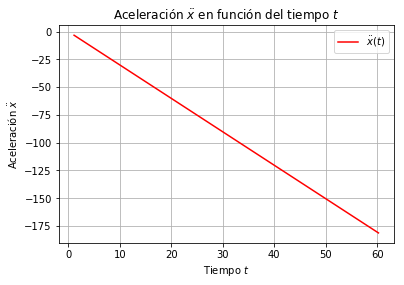

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt #Importación del módulo matplotlib y asignación del nickname plt;
import pandas as pd #importación del módulo pandas y asignación del nickname pd;

#apertura de un archivo .dat usando una variable temporal file;
with open("datos.dat", "r") as file:
    archivo=file.read()

#creación de lista files con el contenido del archivo .dat;
files=[i for i in archivo if i is not "\n" ] #eliminación de los saltos de líneas;
files=files[18:] #eliminación de 17 bits de información en la lista files para dejar el contenido númerico;

new_files=" " #creación de string vacío new_files;

#concatenación de los elementos de files en new_files;
for i in files:
    new_files+=i
    
files=new_files.split(" ") #conversión de files de ser un string a una lista;

files=[i for i in files if i is not ''] #eliminación de elementos que son un espacio en blanco;

files=[float(i) for i in files] #transformación de los elementos de files de ser strings a ser de tipo real;

#creación de listas vacías;
t=[] #almacén de los datos de tiempo;
x=[] #almacén de los datos de posición;
h=[] #almacén de los datos de intervalos temporales;
f_1_3=[] #almacén de los datos de la primera derivada de x con paso adaptativo;
f_2_3=[] #almacén de los datos de la segunda derivada de x con paso adaptativo;

#la lista files tiene como elementos en las posiciones pares los datos del tiempo,
#en las posiciones impares están los datos de la posición;

#para posición x y tiempo t;
for i in range(len(files)):
    if i%2==0:
        t.append(files[i]) #agregar solo las posiciones pares de files;
    else:
        x.append(files[i]) #agregar solo las posiciones impares de files;

#para h;
for i in range(len(t)):
    if i==len(t)-1:
        pass #eliminar el último punto porque no existe un punto información posterior;
    else:
        h.append(t[i+1]-t[i]) #definición de intervalos temporales;

#para las derivadas;
for i in range(len(x)):
    if i==0 or i==len(x)-1:
        pass
    else:
        f_1_3.append((h[i-1]**2*x[i+1]+(h[i]**2-h[i-1]**2)*x[i]-h[i]**2*x[i-1])/(h[i]*h[i-1]**2+h[i-1]*h[i]**2))
        f_2_3.append((2*(h[i-1]*x[i+1]+h[i]*x[i-1]-x[i]*(h[i-1]+h[i])))/(h[i]*h[i-1]**2+h[i-1]*h[i]**2))

x.pop(0) #eliminación del primer elemento en x;
x.pop(len(x)-1) #eliminación del último elemento en x;
t.pop(0) #eliminación del primer elemento en t;
t.pop(len(t)-1) #eliminación del último elemento en t;

datos={"t":t, "x":x, "dx(3)":f_1_3, "ddx(3)":f_2_3} #diccionario con los datos del archivo .dat almacenados;
df=pd.DataFrame(datos) #creación de un dataframe con la información del diccionario datos;
df.to_csv("datos.csv") #transformación del dataframe df a un archivo csv;
df=pd.read_csv("datos.csv", header=None, skiprows=1, names=["Número", "t", "x",
                                                                              "dx(3)", "ddx(3)"]) #lectura de datos
while True:
    Q=input("¿Desea ver la tabla de datos del archivo datos.dat? y/n: ")
    if Q=="y":
        print(df) #visualización de los datos.
        break
    else:
        break
        
msm_2="¿Desea usar el graficador de datos? y/n: "
print("="*(len(msm_2)+2))
Q_1=input(msm_2) 
print("="*(len(msm_2)+2))
while True:
    if Q_1=="y":
        print("Elija alguna de estas optiones introduciendo el número de la opción: ")
        print("1. Gráfico de posición en función del tiempo")
        print("2. Gráfico de velocidad en función del tiempo")
        print("3. Gráfico de aceleración en función del tiempo")
        print("4. Gráfico combinado de posición, velocidad y aceleración vs tiempo")
        print("5. salir")
        print(" ")
        ch=input("Por favor introduzca el número de la opción que desea usar: ")
        print(" ")
        if ch=="1" or ch=="2" or ch=="3" or ch=="4" or ch=="5":
            if ch=="1":
                plt.plot(t,x,"-.",color="blue",label="$x(t)$")
                plt.title("Posición $x$ en función del tiempo $t$")
                plt.xlabel("Tiempo $t$")
                plt.ylabel("Posición $x(t)$")
                plt.grid(True)
                plt.legend()
                plt.show()
                break #salida del búcle infinito
            elif ch=="2":
                plt.plot(t,f_1_3,"--",color="green",label="$\dot{x}(t)$")
                plt.title("Velocidad $\dot{x}$ en función del tiempo $t$")
                plt.xlabel("Tiempo $t$")
                plt.ylabel("Velocidad $\dot{x}(t)$")
                plt.grid(True)
                plt.legend()
                plt.show()
                break #salida del búcle infinito    
            elif ch=="3":
                plt.plot(t,f_2_3,"-",color="red",label="$\ddot{x}(t)$")
                plt.title("Aceleración $\ddot{x}$ en función del tiempo $t$")
                plt.xlabel("Tiempo $t$")
                plt.ylabel("Aceleración $\ddot{x}$")
                plt.grid(True)
                plt.legend()
                plt.show()
                break #salida del búcle infinito
            elif ch=="4":
                plt.plot(t,x,"-.",color="blue",label="$x(t)$")
                plt.plot(t,f_1_3,"--",color="green",label="$\dot{x}(t)$")
                plt.plot(t,f_2_3,"-",color="red",label="$\ddot{x}(t)$")
                plt.title("Posición, velocidad y aceleración en función del tiempo $t$")
                plt.xlabel("Tiempo $t$")
                plt.grid(True)
                plt.legend()
                plt.show()
                break #salida del búcle infinito
            elif ch=="5":
                break #salida del búcle infinito
        else:
            msm_2="Intente con alguna de las siguientes opciones: 1, 2, 3, 4 o 5."
            print("="*len(msm_2)) #construcción de dercorador
            print("¡Entrada mala!")
            print(msm_2) #mensaje de aclaración
            print("="*len(msm)) #decorador